<a href="https://colab.research.google.com/github/frlps/IE708A_FEEC_UNICAMP_S12021/blob/main/Prova_IE708A_S12021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1. 1 Medidas de Campo (Probability Density Function – PDF, e Cumulative Distribution Function – CDF). 
Em um cenário de desvanecimento, foram feitas medidas de campo com o objetivo de se caracterizar o ambiente em termos de suas estatísticas. Os dados coletados apresentam-se na tabela seguinte:

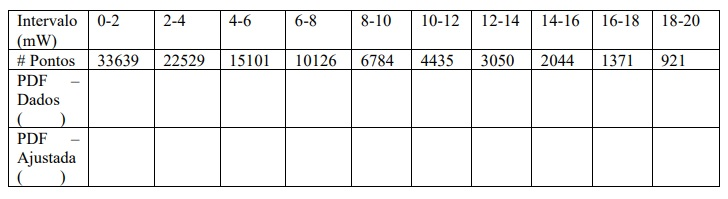

## a. A partir do histograma dos dados, sugira uma PDF dentre aquelas conhecidas para possível ajuste aos dados.

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
IntervaloPot = ['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20']
Intervalo = [0,2,4,6,8,10,12,14,16,18]
IntervaloMedia = [1,3,5,7,9,11,13,15,17,19]
Pontos = [33639,22529,15101,10126,6784,4435,3050,2044,1371,921]

In [6]:
len(IntervaloPot),len(IntervaloMedia), len(Pontos)

(10, 10, 10)

In [7]:
dfQuestao1 = pd.DataFrame(list(zip(Intervalo, IntervaloMedia, Pontos)), columns = ['Intervalo','Media_Intervalo', 'Frequencia'], index=IntervaloPot)
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia
0-2,0,1,33639
2-4,2,3,22529
4-6,4,5,15101
6-8,6,7,10126
8-10,8,9,6784
10-12,10,11,4435
12-14,12,13,3050
14-16,14,15,2044
16-18,16,17,1371
18-20,18,19,921


In [8]:
Pontos_Totais = dfQuestao1.Frequencia.sum()
Pontos_Totais

100000

In [9]:
sns.set()

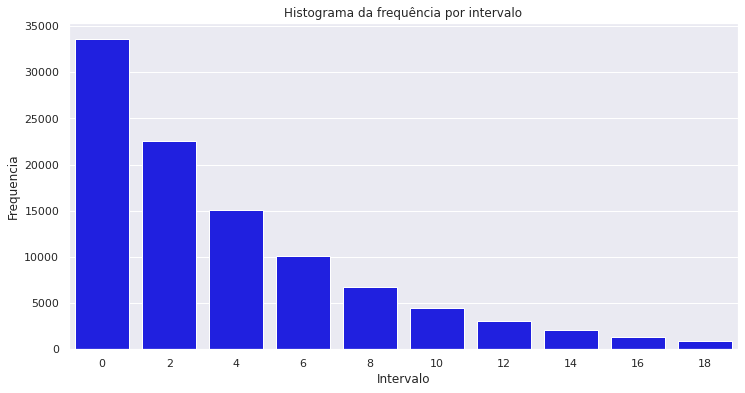

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=dfQuestao1, x='Intervalo', y='Frequencia', color="blue")
plt.title('Histograma da frequência por intervalo')
plt.show()

Pelo histograma acima podemos inferir que a PDF 𝑓W(𝑤) da potência do sinal recebido em um ambiente sem fio pode ser modelada por uma exponencial negativa tal que: 

$$𝑓_W(𝑤) = \lambda e^{-(\lambda w)}$$

$$𝑓_W(𝑤) = \frac {1}{W_m} e^{-(\frac{𝑤}{W_m})}$$ 

Onde $W_m$ é a potência média. 

## b. Ajuste a PDF sugerida aos dados. Uma maneira de fazer isso é determinar os parâmetros da PDF-alvo a partir dos dados. Plote e contraste as PDFs teórica e empírica.

Para tanto devemos calcular a média, que para o caso discreto é $Wm = \frac {1}{10^5} \sum x_i freq_i = E(w)$

Portanto:

In [11]:
Wm = 0
for i in range(0,len(Pontos)):
  # print(Pontos[i],IntervaloMedia[i])
  Wm += Pontos[i]*IntervaloMedia[i]
Wm *= (1/10**5)
Wm = round(Wm,4)
print(f'A pontencia média é {Wm} mW')

A pontencia média é 4.6857 mW


Portanto, a PDF 𝑓W(𝑤) para a distribuição apresentada é:  $$𝑓_W(𝑤) = \frac {1}{4.6857} e^{-(\frac{𝑤}{4.6857})}$$ 

In [12]:
dfQuestao1['PDF_Ajustada'] = (1/Wm)*np.exp(-(dfQuestao1.Media_Intervalo)*(1/Wm))
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia,PDF_Ajustada
0-2,0,1,33639,0.172401
2-4,2,3,22529,0.112505
4-6,4,5,15101,0.073418
6-8,6,7,10126,0.047910
8-10,8,9,6784,0.031265
10-12,10,11,4435,0.020403
12-14,12,13,3050,0.013314
14-16,14,15,2044,0.008689
16-18,16,17,1371,0.005670
18-20,18,19,921,0.003700


Para a PDF teórica, temos que: $f_w(w) = \frac{dF_w(w)}{dw}$

Fazendo a derivada: $f_w(w) = \frac{F_w(w+\frac{\Delta w}{2})+F_w(w-\frac{\Delta w}{2})}{\Delta w}$

Portanto: $f_w(w) = \frac{frequência}{intervalo}$

E a frequência: $ \frac{Pontos}{Total de Pontos}$

In [13]:
fw_teorico = []
for i in range(0,len(Pontos)):
  fw_teorico.append((1/2)*(Pontos[i]/Pontos_Totais))

fw_teorico

[0.168195,
 0.112645,
 0.075505,
 0.05063,
 0.03392,
 0.022175,
 0.01525,
 0.01022,
 0.006855,
 0.004605]

In [14]:
dfQuestao1['PDF_Dados'] = fw_teorico
dfQuestao1

,Intervalo,Media_Intervalo,Frequencia,PDF_Ajustada,PDF_Dados
0-2,0,1,33639,0.172401,0.168195
2-4,2,3,22529,0.112505,0.112645
4-6,4,5,15101,0.073418,0.075505
6-8,6,7,10126,0.047910,0.050630
8-10,8,9,6784,0.031265,0.033920
10-12,10,11,4435,0.020403,0.022175
12-14,12,13,3050,0.013314,0.015250
14-16,14,15,2044,0.008689,0.010220
16-18,16,17,1371,0.005670,0.006855
18-20,18,19,921,0.003700,0.004605


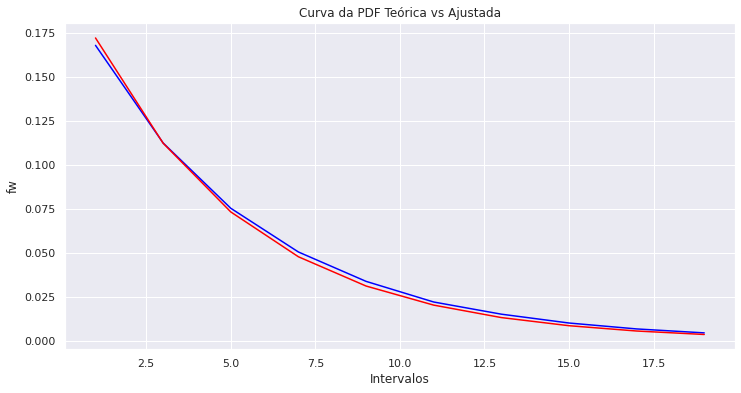

In [15]:
plt.figure(figsize=(12,6))
plt.plot(dfQuestao1['Media_Intervalo'],dfQuestao1['PDF_Dados'], color='Blue')
plt.plot(dfQuestao1['Media_Intervalo'],dfQuestao1['PDF_Ajustada'], color='Red')
plt.title('Curva da PDF Teórica vs Ajustada')
plt.ylabel('fw')
plt.xlabel('Intervalos')
plt.show()

## c. Determine o desvio padrão a partir dos dados e a partir da PDF ajustada e compare ambos.

Para a distribuição ajustada:

Sabemos que: $$ DesvioPadrao = \sqrt{Variancia} $$


$$Variancia = E^2(x)$$ 

Portanto: $$ DesvioPadrao = \sqrt{E(x)^2} = E(x) = Wm $$

In [16]:
desv_Pad_Ajustada = Wm
desv_Pad_Ajustada

4.6857

Para a distribuição a partir dos dados:

Sabemos que: $$ DesvioPadrao = \sqrt{Variancia} $$


e que: $$ Variancia =  \sigma^2 = E(x^2) - E^2(x)$$


Portanto: $$ DesvioPadrao = \sqrt{E(x^2)-E^2(x)}$$

In [17]:
E_w2 = 0
for i in range(0,len(Pontos)):
  E_w2 += ((IntervaloMedia[i]**2)*(Pontos[i])) 

E_w2=E_w2*(1/10**5)
E_w2 = round(E_w2,6)
E_w2

39.00288

In [18]:
E2_w = Wm**2 
E2_w

21.95578449

In [19]:
Variancia_Dados=E_w2-E2_w
Variancia_Dados

17.04709551

In [20]:
Desvio_Pad_Dados = round(np.sqrt(Variancia_Dados),4)
Desvio_Pad_Dados

4.1288

In [21]:
print(f'O desvio padrão da pdf ajustada é {desv_Pad_Ajustada}, e o desvio padrão a partir dos dados é {Desvio_Pad_Dados}')

O desvio padrão da pdf ajustada é 4.6857, e o desvio padrão a partir dos dados é 4.1288


## d. Preencha as duas últimas linhas da tabela com o valor da PDF em cada ponto a partir dos dados e o valor da PDF em cada ponto a partir do ajuste. Não se esqueça de também preencher o espaço entre parênteses com a unidade correspondente (se houver)

In [22]:
dfQuestao1_d = dfQuestao1.drop(['Intervalo','Media_Intervalo'], axis=1)
dfQuestao1_d.rename(columns={'PDF_Ajustada':'PDF_Ajustada(1/mW)','PDF_Dados':'PDF_Dados(1/mW)'}, inplace=True)
dfQuestao1_d

,Frequencia,PDF_Ajustada(1/mW),PDF_Dados(1/mW)
0-2,33639,0.172401,0.168195
2-4,22529,0.112505,0.112645
4-6,15101,0.073418,0.075505
6-8,10126,0.047910,0.050630
8-10,6784,0.031265,0.033920
10-12,4435,0.020403,0.022175
12-14,3050,0.013314,0.015250
14-16,2044,0.008689,0.010220
16-18,1371,0.005670,0.006855
18-20,921,0.003700,0.004605


## e. Determine a CDF teórica e plote-a contrastando-a com a empírica.

In [23]:
cdf_empirica = []
soma = 0

for i in range (0,10):
  soma += dfQuestao1.PDF_Ajustada[i]*2 # 2 que é o delta w
  cdf_empirica.append(soma)

cdf_empirica

[0.34480252339362166,
 0.5698117227921629,
 0.7166469005503459,
 0.812467735809124,
 0.8749979319778567,
 0.9158035190126659,
 0.9424321886039504,
 0.9598093689296964,
 0.971149266893368,
 0.9785493907003335]

In [24]:
dfQuestao1_CDF = dfQuestao1.drop(['Media_Intervalo','Frequencia'], axis=1)
dfQuestao1_CDF['CDF_Empirica'] = cdf_empirica
dfQuestao1_CDF

,Intervalo,PDF_Ajustada,PDF_Dados,CDF_Empirica
0-2,0,0.172401,0.168195,0.344803
2-4,2,0.112505,0.112645,0.569812
4-6,4,0.073418,0.075505,0.716647
6-8,6,0.047910,0.050630,0.812468
8-10,8,0.031265,0.033920,0.874998
10-12,10,0.020403,0.022175,0.915804
12-14,12,0.013314,0.015250,0.942432
14-16,14,0.008689,0.010220,0.959809
16-18,16,0.005670,0.006855,0.971149
18-20,18,0.003700,0.004605,0.978549


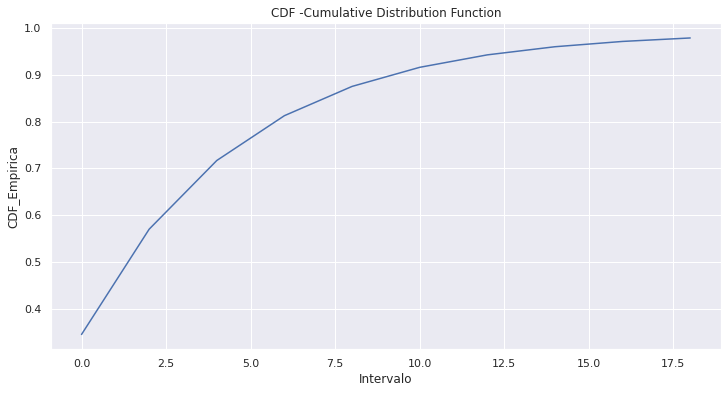

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Empirica")
plt.title('CDF -Cumulative Distribution Function')
plt.show()

In [26]:
lambda1 = 1/Wm
lambda1

0.21341528480269759

In [27]:
def cdf_teorica_function(ponto_medio,lambda1):
  Fw = 1-np.exp(-(lambda1*ponto_medio))
  return Fw

In [28]:
cdf_teorica = []
for i in IntervaloMedia:
  cdf_teorica.append(cdf_teorica_function(i,lambda1))
cdf_teorica

[0.19217940806725353,
 0.47283719718912776,
 0.6559872037892411,
 0.7755061561139716,
 0.8535011299060847,
 0.9043986304154973,
 0.937613021448059,
 0.959287873073826,
 0.9734323200558118,
 0.982662619938851]

In [29]:
dfQuestao1_CDF['CDF_Teorica'] = cdf_teorica
dfQuestao1_CDF

,Intervalo,PDF_Ajustada,PDF_Dados,CDF_Empirica,CDF_Teorica
0-2,0,0.172401,0.168195,0.344803,0.192179
2-4,2,0.112505,0.112645,0.569812,0.472837
4-6,4,0.073418,0.075505,0.716647,0.655987
6-8,6,0.047910,0.050630,0.812468,0.775506
8-10,8,0.031265,0.033920,0.874998,0.853501
10-12,10,0.020403,0.022175,0.915804,0.904399
12-14,12,0.013314,0.015250,0.942432,0.937613
14-16,14,0.008689,0.010220,0.959809,0.959288
16-18,16,0.005670,0.006855,0.971149,0.973432
18-20,18,0.003700,0.004605,0.978549,0.982663


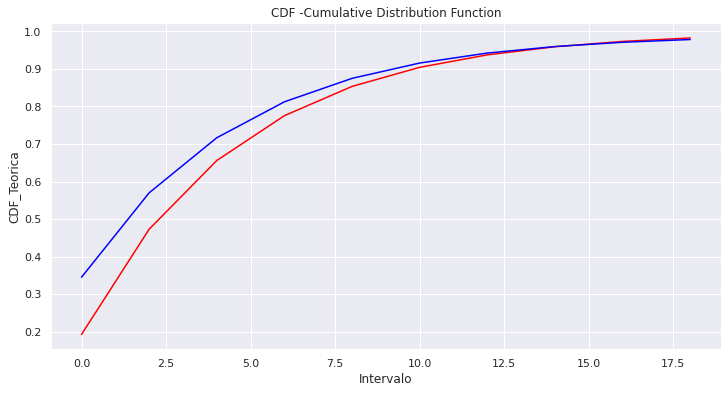

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Teorica",color='red')
sns.lineplot(data=dfQuestao1_CDF, x="Intervalo", y="CDF_Empirica", color='blue')
plt.title('CDF -Cumulative Distribution Function')
plt.show()

## f. Determine a PDF teórica da envoltória correspondente.

A PDF da envoltóiria, 𝑓W(𝑤) para a distribuição apresentada é:  $$𝑓_W(𝑤) = \frac {1}{4.6857} e^{-(\frac{𝑤}{4.6857})}$$  para $$ ,w >=0 $$

ou

$$𝑓_W(𝑤) = 0.2134 * e^{-(0.2134 * w)}$$  para $$ ,w >=0 $$

#  2. 2 Interferência Co-Canal (Carrier-to-Interference-plus-Noise Ratio – CINR).
Considere um sistema com padrão quadrangular e a primeira camada de células 
interferentes. Suponha que a **potência do ruído seja uma proporção 10% de um sinal interferente de uplink da primeira camada de células interferentes**. Considere um sistema operando com: 

* (i) antenas transmissora e receptora de 4 m e 1,5 m, respectivamente; 
* (ii)frequência de 1,8 GHz; 
* (iii) padrão de reuso de cinco (cruciforme); 
* (iv) distâncias entre ERBs de 200 m; 
* (v) largura de ruas de 15 m.


In [31]:
ht = 4 #Altura da entena de transmissão

In [32]:
hr = 1.5 #Altura da antena de recepção (móvel - altura do usuário)

In [33]:
R = 200 #Metros

## a. Determine a parcela relativa ao ruído.

 Sabendo-se que a C/I do uplink para uma microcélula no primeiro "layer" (L=1) é:

 $$ \frac{C}{I} =  \frac{n_1^2 [1+(n_1k)^2]}{4r^2 [1+(rk)^2]}$$

e que a potência do ruído seja uma proporção 10% de um sinal interferente de uplink da primeira camada de células interferentes, temos que a parcela referente ao ruído é de:

 $$I_{ruido} = \frac{1}{10} 4r^2 [1+(rk)^2]$$

## b. Determine a CINR para o usuário a 7,5 m da ERB (imediatamente antes de adentrar a quadra) supondo todos os interferentes ativos.

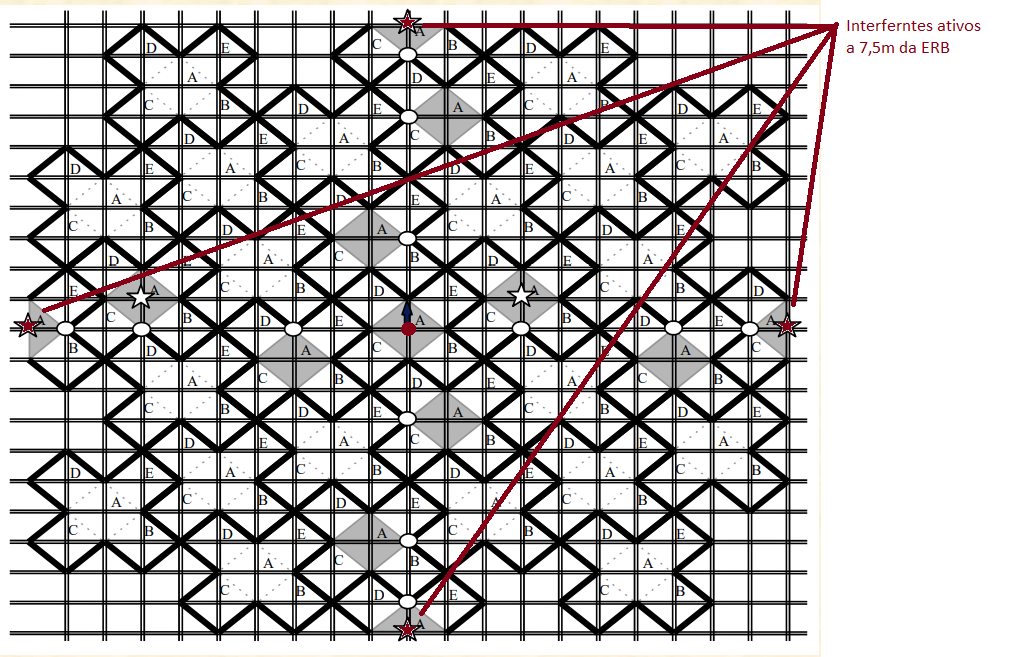

Dado que a rua tem 15m de largura, o usuário continua recebendo ***'LOS'*** das estações na 'linha de visada' tanto na vertical, como na horizontal, conforme desenho acima, onde a ERB está no centro e as demais estão nas estrelas vermelhas identificadas próximas às restas da figura.

 Assim sendo:


 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{\sum_{L=1}^{inf}[(n_L+r)^{-2}[1+(n_L+r)^2k^2]^{-1}+(n_L-r)^{-2}[1+(n_L-r)^2k^2]^{-1}+2(n_L^2+r^2)^{-1}[1+(n_L^2+r^2)k^2]^{-1}]}$$



In [34]:
db = (4*ht*hr)/(1/6)
db

144.0

In [35]:
lambdaOnda = round(3/18,4)
lambdaOnda

0.1667

In [36]:
k= round(R/db,4)
k

1.3889

Para L=1

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}+2(n_1^2+r^2)^{-1}[1+(n_1^2+r^2)k^2]^{-1}]}$$

In [59]:
d1 = 7.5

In [60]:
r1 = d1/R
r1 

0.0375

In [54]:
num = r1**(-2)*((1+r1*k)**2)**(-1) 
num

642.4463100708547

In [50]:
parcela_den1 = ((n1+r1)**(-2))*((1+((n1+r1)**2)*(k**2))**(-1))
parcela_den1

5.080740152596845e-05

In [51]:
parcela_den2 = ((n1-r1)**(-2))*((1+((n1-r1)**2)*(k**2))**(-1))
parcela_den2

5.235067462373887e-05

In [52]:
parcela_den3 = 2*(n1**2+r1**2)*((1+(n1**2+r1**2)*(k**2))**(-1))
parcela_den3

1.031436604779804

In [53]:
den = parcela_den1+parcela_den2+parcela_den3
den

1.0315397628559537

In [57]:
CNIR1 = num/den
CNIR1

622.8032434660176

In [89]:
CNIR1LOG = 10*np.log(CNIR1)
CNIR1LOG

64.34230647823638

## c. Idem a questão 'b', para o usuário a 50 m da ERB.

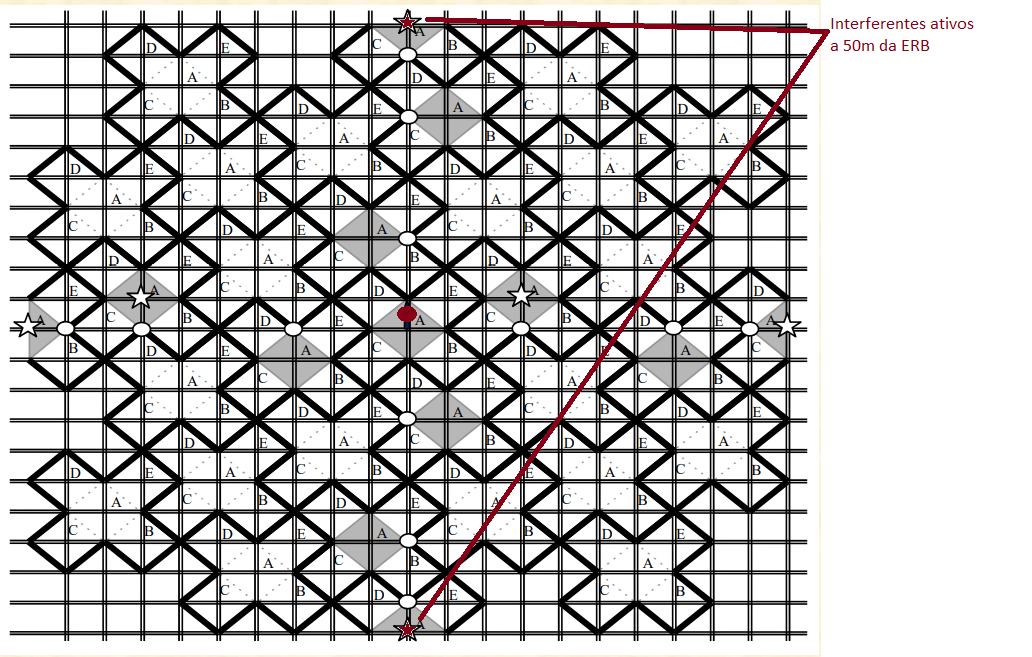

O usuário atravessou a rua e agora encontra-se entre os blocos. Isso faz com que o ***'LOS'*** das estações na 'linha de visada' ***vertical permaneçem***, mas da horizontal fiquem bloqueadas pelos blocos da quadra, conforme desenho acima, onde a ERB está no centro e as demais estão nas estrelas vermelhas identificadas próximas às arestas da figura.

 Assim sendo:

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{\sum_{L=1}^{inf}[(n_L+r)^{-2}[1+(n_L+r)^2k^2]^{-1}+(n_L-r)^{-2}[1+(n_L-r)^2k^2]^{-1}]}$$

In [61]:
d2 = 50

In [62]:
r2 = d2/R
r2 

0.25

Para L=1

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}}$$

In [64]:
num2 = r2**(-2)*((1+r2*k)**2)**(-1) 
num2

8.815353168662392

In [66]:
parcela_den1_2 = ((n1+r2)**(-2))*((1+((n1+r2)**2)*(k**2))**(-1))
parcela_den1_2

4.6733142747750626e-05

In [67]:
parcela_den2_2 = ((n1-r2)**(-2))*((1+((n1-r2)**2)*(k**2))**(-1))
parcela_den2_2

5.705290136480967e-05

In [68]:
den2 = parcela_den1_2+parcela_den2_2
den2

0.0001037860441125603

In [69]:
CNIR2 = num2/den2
CNIR2

84937.75096680412

In [90]:
CNIR2LOG = 10*np.log(CNIR2)
CNIR2LOG

113.49673925612362

## d. Idem a questão 'b', para o usuário a 100 m da ERB.

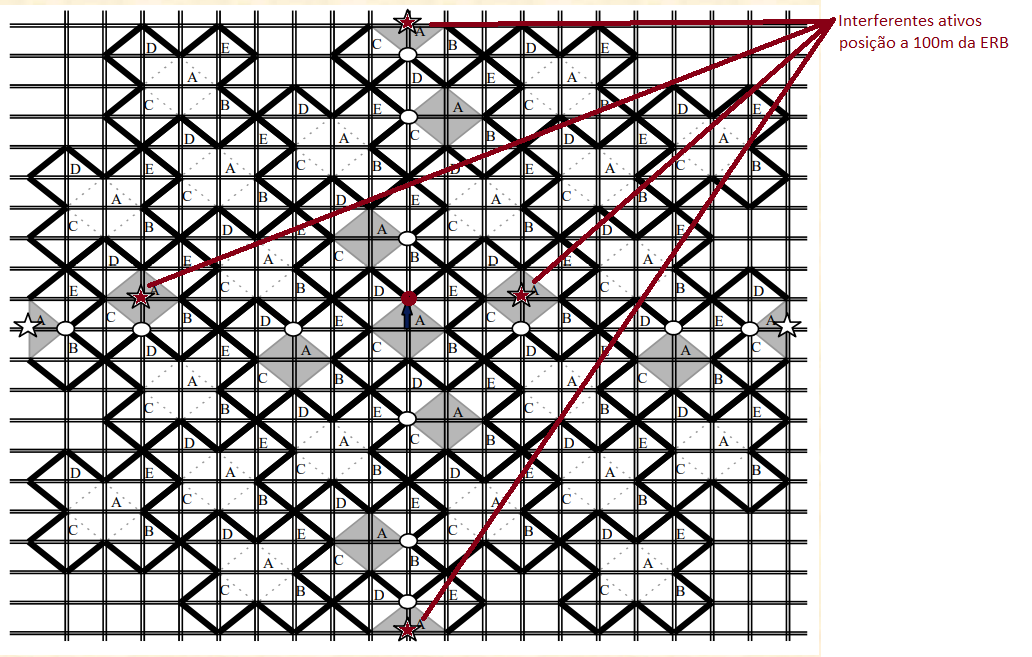

O usuário atravessou os blocos. Isso faz com que o ***'LOS'*** das estações na 'linha de visada' ***vertical permaneçem***, e apareçam novos da horizontal, conforme desenho acima, onde a ERB está no centro e as demais estão nas estrelas vermelhas identificadas próximas às arestas e próximas do centro da figura.

 Assim sendo:

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{\sum_{L=1}^{inf}[(n_L+r)^{-2}[1+(n_L+r)^2k^2]^{-1}+(n_L-r)^{-2}[1+(n_L-r)^2k^2]^{-1}+(n_{lc}^2+r_c^2)^{-1}[1+(n_{lc}^2+r_c^2)k^2]^{-1}]}$$

Para L=1

 $$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}+(n_{1m}^2+r_m^2)^{-1}[1+(n_{1m}^2+r_m^2)k^2]^{-1}]}$$

In [71]:
d3 = 100

In [72]:
r3 = d3/R
r3 

0.5

In [74]:
r3c = 1-r3
r3c

0.5

* $$nk = 2Nk$$
* $$n_{1+2(k−1)} = p + 2N (k − 1)$$
* $$n_{2+2(k−1)} = 2N − p + 2N (k − 1)$$

In [75]:
p=3

In [76]:
n1c = p+2*n1*(k-1)
n1c

10.778

In [77]:
num3 = r3**(-2)*((1+r3*k)**2)**(-1) 
num3

1.3931647424683036

In [78]:
parcela_den1_3 = ((n1+r3)**(-2))*((1+((n1+r3)**2)*(k**2))**(-1))
parcela_den1_3

4.244862195949275e-05

In [79]:
parcela_den2_3= ((n1-r3)**(-2))*((1+((n1-r3)**2)*(k**2))**(-1))
parcela_den2_3

6.328141668905067e-05

In [82]:
parcela_den3_3 = ((n1c**2+r3c**2)**(-1))*(1+((n1c**2+r3c**2)*(k**2))**(-1))
parcela_den3_3

0.008628187964493527

In [83]:
den3 = parcela_den1_3+parcela_den2_3+parcela_den3_3
den3

0.00873391800314207

In [84]:
CNIR3 = num3/den3
CNIR3

159.5120015973479

In [91]:
CNIR3LOG = 10*np.log(CNIR3)
CNIR3LOG

50.72119164518565

*D.4 Prime Noncollinear Type
In the prime noncollinear, d = 2N. We define p as a parameter that designates the prime number immediately prior to N, and that satisfies the relation
p = i 2 + j 2. The only exception to this is when N = 5, for which p = 3.

* Uplink
n1+3(k−1) = p + 2N (k − 1)
n2+3(k−1) = 2N − p + 2N (k − 1)
n3+3(k−1) = 2Nk − 1

* **Downlink
nk = 2Nk negrito**

In [40]:
N = 5

In [41]:
n1 = 2*N*1
n1

10

Para d = 7,5m da ERB no padrão de reuso 5 e demais características apresentadas: 
  
$$\frac{C}{I} = \frac{r^{-2}[1+(rk)^2]^{-1}}{[(n_1+r)^{-2}[1+(n_1+r)^2k^2]^{-1}+(n_1-r)^{-2}[1+(n_1-r)^2k^2]^{-1}+2(n_1^2+r^2)^{-1}[1+(n_1^2+r^2)k^2]^{-1}}$$

$$ $$

$$\frac{C}{I}_1 = \frac{r1^{-2}[1+(r1k)^2]^{-1}}{[(n_1+r1)^{-2}[1+(n_1+r1)^2k^2]^{-1}+(n_1-r1)^{-2}[1+(n_1-r1)^2k^2]^{-1}+2(n_1^2+r1^2)^{-1}[1+(n_1^2+r1^2)k^2]^{-1}}$$

$$ $$

$$\frac{C}{I}_1 = \frac{0.0375^{-2}[1+(0.0375*1.3889)^2]^{-1}}{[(10+0.0375)^{-2}[1+(10+0.0375)^2*1.3889^2]^{-1}+(10-0.0375)^{-2}[1+(10-0.0375)^2*1.3889^2]^{-1}+2(10^2+0.0375^2)^{-1}[1+(10^2+0.0375^2)*1.3889^2]^{-1}}$$

In [ ]:
Interferer1 = ((10+0.0375)**(-2))*((1+((10+0.0375)**2)*1.3889**2)**(-1))
Interferer1

In [ ]:
Interferer2 = ((10-0.0375)**(-2))*((1+((10-0.0375)**2)*1.3889**2)**(-1))
Interferer2

In [ ]:
Interferer3 = 2*((10**2+0.0375**2)**(-1))*((1+(10*2+0.0375**2)*1.3889**2)**(-1))
Interferer3

In [ ]:
Interferer = Interferer1+Interferer2+Interferer3
Interferer

In [ ]:
Carrier/Interferer

In [ ]:
np.log10(20.7477)